# EDA

### Feature 개요

* id : 샘플 아이디
* Gender : 전복 성별
* Lenght : 전복 길이
* Diameter : 전복 둘레
* Height : 전복 키
* Whole Weight : 전복 전체 무게
* Shucked Weight : 껍질을 제외한 무게
* Viscra Weight : 내장 무게
* Shell Weight : 껍질 무게
* Target : 전복 나이

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_raw = pd.read_csv('./train2.csv')
test_raw = pd.read_csv('./test2.csv')

# 불필요한 Feature 제거
train_df = train_raw.drop(columns = ['id','Unnamed: 0'])
test_df = test_raw.drop(columns = ['id','Unnamed: 0'])

print('test: ', np.shape(test_df))
print('train: ', np.shape(train_df))

test:  (126, 9)
train:  (1127, 9)


- 훈련set의 instance가 1127개로 양이 매우 적은 상황

In [2]:
train_df

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9
...,...,...,...,...,...,...,...,...,...
1122,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12
1123,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6
1125,F,0.590,0.455,0.150,0.9760,0.4650,0.2055,0.2765,10


In [3]:
train_df.describe()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [4]:
train_df.isna().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

- 결측치 없음

In [5]:
train_df.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

- Gender는 numerical feature가 아님

In [6]:
# numerical 과 categorical 피쳐 분리하여 따로 저장 (나중에 사용하기 위해)
numeric_feature = train_df.columns[(train_df.dtypes==int) | (train_df.dtypes== float)]
categorical_feature = train_df.columns[train_df.dtypes==object]

print(numeric_feature)
print(categorical_feature)

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight'],
      dtype='object')
Index(['Gender'], dtype='object')


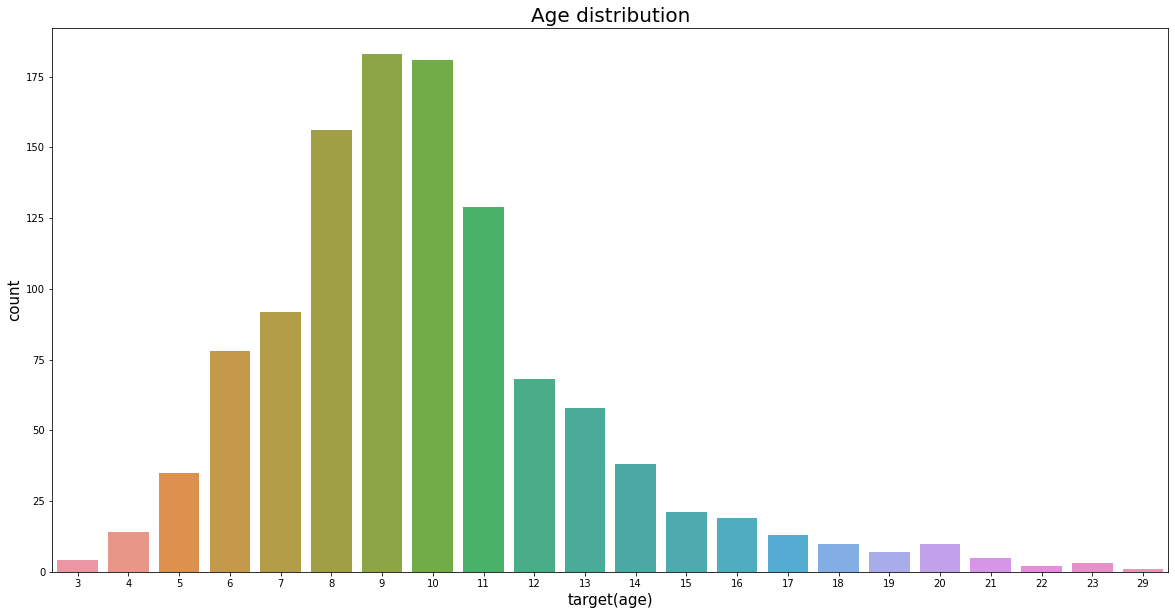

평균나이: 9.921, 최댓값: 29, 표준편차: 3.2367 표본수: 1127


In [7]:
# 나이 분포 시각화, 평균나이, 표준편차, 최댓값, 표본수
plt.rcParams['figure.figsize'] = [20,10]
sns.countplot(x = 'Target' , data = train_df)
plt.title('Age distribution', fontsize=20)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()
plt.close()

mean = round(train_df['Target'].mean() ,4)
max = train_df['Target'].max()
std = round(train_df['Target'].std() ,4)
total = train_df['Target'].count()
print(f"평균나이: {mean}, 최댓값: {max}, 표준편차: {std} 표본수: {total}")

In [8]:
# 나이별 샘플 개수
arr = [1]*30
arr[0:] = [0 for aa in arr]

for age in train_df['Target']:
  arr[age] += 1
arr2 = [tuple((i,arr[i])) for i in range(30)]
first_tuple_elements = [a_tuple[0] for a_tuple in arr2]
for i in first_tuple_elements:
  print(f'{i}살 : {arr[i]}')

0살 : 0
1살 : 0
2살 : 0
3살 : 4
4살 : 14
5살 : 35
6살 : 78
7살 : 92
8살 : 156
9살 : 183
10살 : 181
11살 : 129
12살 : 68
13살 : 58
14살 : 38
15살 : 21
16살 : 19
17살 : 13
18살 : 10
19살 : 7
20살 : 10
21살 : 5
22살 : 2
23살 : 3
24살 : 0
25살 : 0
26살 : 0
27살 : 0
28살 : 0
29살 : 1


* 3살 부터 23살까지 이어져서 분포되어있음. 29살은 하나만 있다.

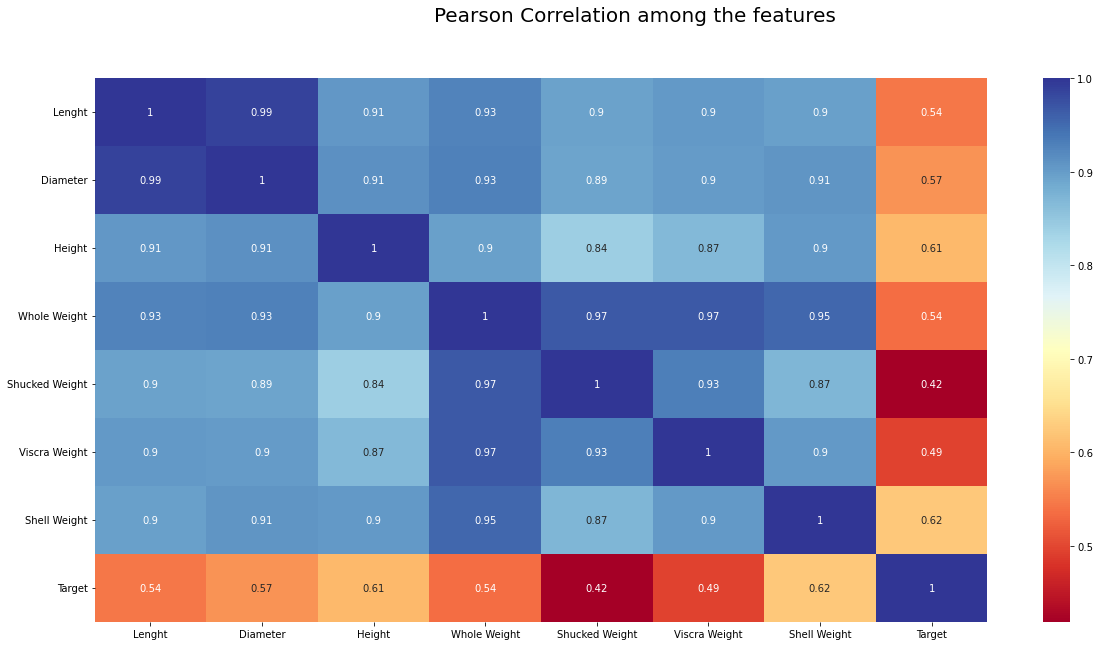

In [9]:
# feature들 상호간 피어슨 상관계수 
plt.figure(figsize=(20,10))
plt.suptitle("Pearson Correlation among the features", fontsize=20)
corr = train_df.corr(method='pearson')
corr_ = corr['Target'][:-1]
sns.heatmap(corr, annot=True, cmap='RdYlBu')

plt.show()
plt.close()

In [10]:
# Target과 피쳐들의 상관관계
temp = corr.unstack()
temp = pd.DataFrame(temp['Target'].sort_values(ascending=False), columns=['Target'])
temp.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.624020
Height,0.606440
Diameter,0.569380
Lenght,0.544288
Whole Weight,0.536748
Viscra Weight,0.494249
Shucked Weight,0.418847


* Target과의 상관계수는 어느 것 하나 튀는 것 없이 서로 비슷비슷하다
* target과의 상관계수가 가장 낮은 것은 Shucked weight(껍질을 제외한 무게) 
* feature들 상호간 상관관계가 매우 높다.
* Length와 Diameter는 서로 매우 유사 (피어슨 상관계수가 0.99)


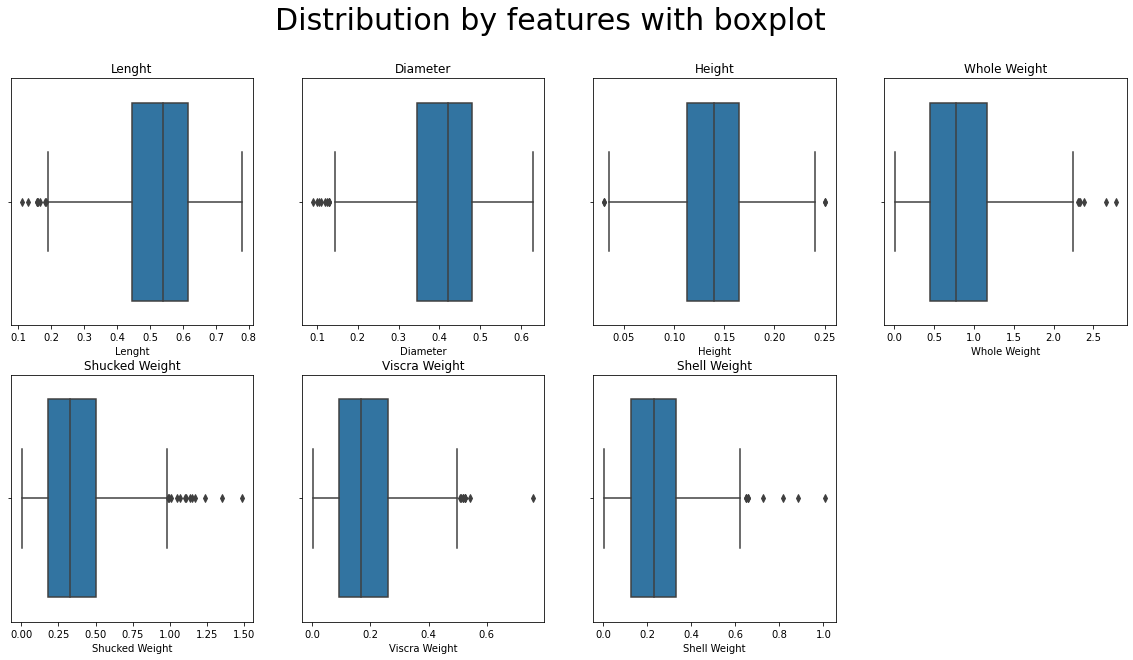

In [11]:
# boxplot 데이터분포
plt.figure(figsize=(20,10))
plt.suptitle("Distribution by features with boxplot", fontsize=30)
for i in range(len(numeric_feature)):
    plt.subplot(2,4,i+1)
    plt.title(numeric_feature[i])
    sns.boxplot(x = train_df[numeric_feature[i]])
plt.show()
plt.close()

* Viscra weight(내장무게)와 target(나이)의 이상치 분포 양상이 가장 비슷하다.

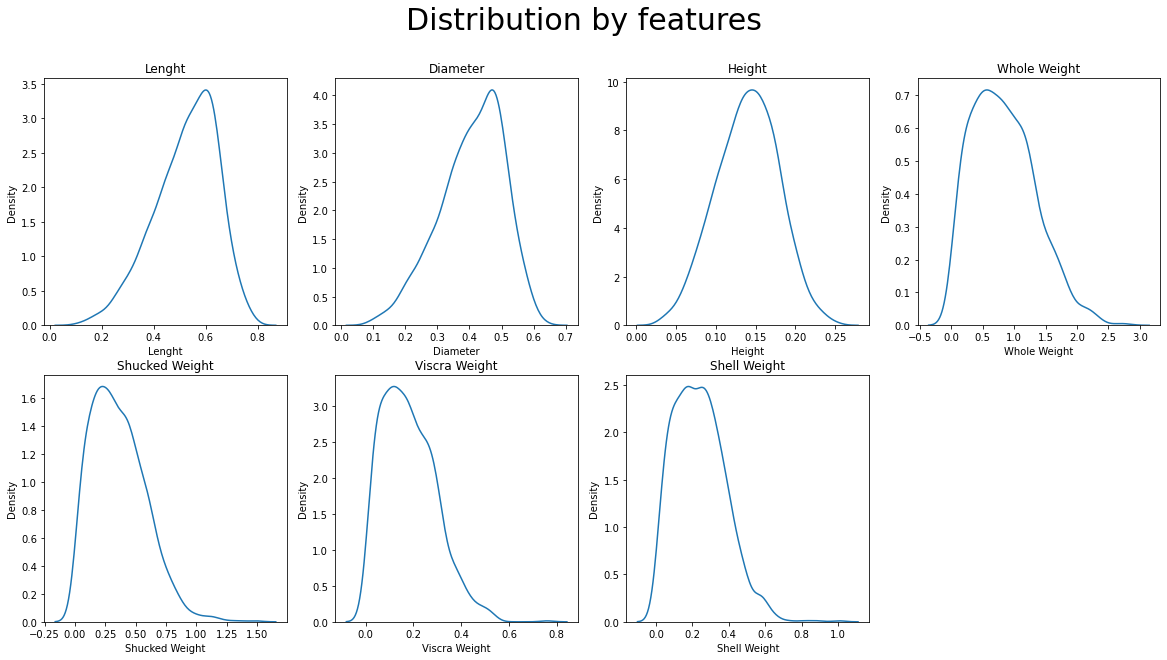

In [12]:
# 데이터의 분포 (boxplot)
plt.figure(figsize=(20,10))
plt.suptitle("Distribution by features", fontsize=30)
for i in range(len(numeric_feature)):
    plt.subplot(2,4,i+1)
    plt.title(numeric_feature[i])
    sns.kdeplot(x = train_df[numeric_feature[i]])
plt.show()
plt.close()

* 나이는 Weight와 유사한 분포 양상을 보인다

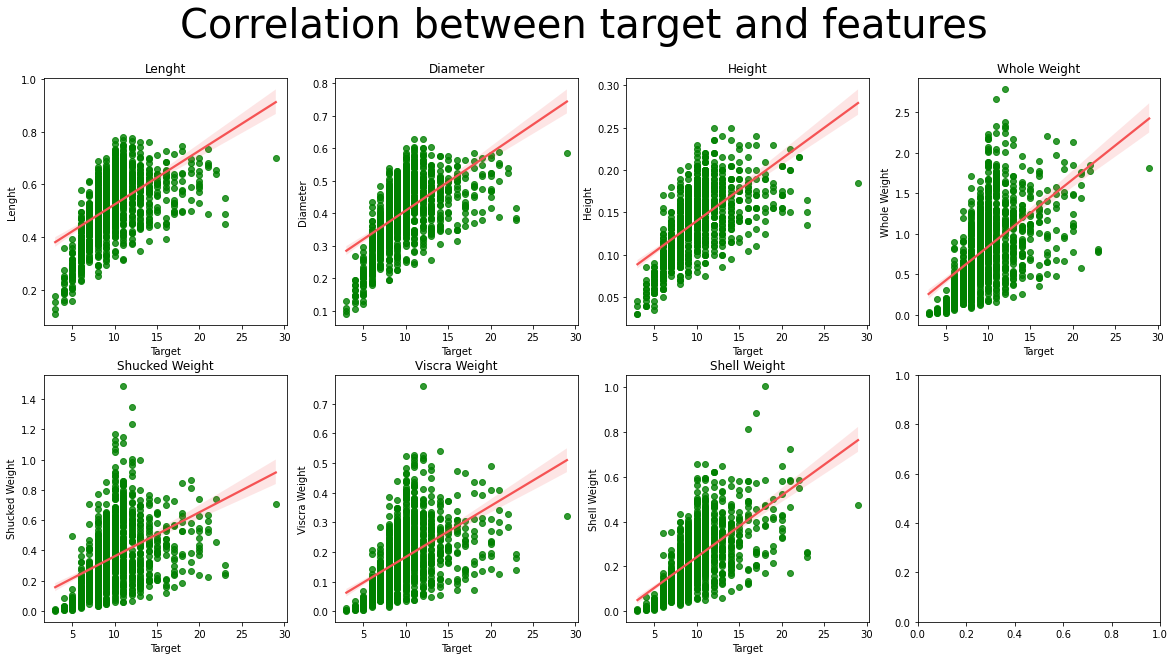

In [13]:
# Target과의 상관관계
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train_df,  color='green', line_kws=  {'color': '#f55354'} , ax = axx)
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,10)
figure.suptitle('Correlation between target and features', fontsize=40)

for i in range(len(train_df.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train_df.columns[i+1])

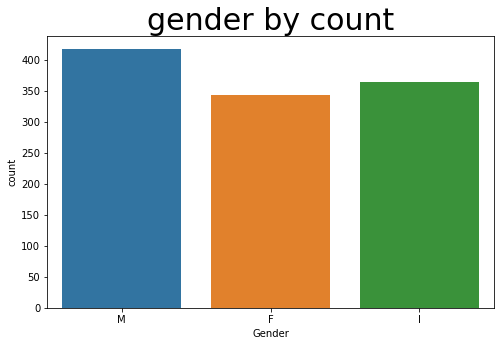

Gender
F    344
I    365
M    418
Name: Lenght, dtype: int64

In [14]:
# 성별 비율
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot(x = 'Gender', data = train_df)
plt.title('gender by count', fontsize=30)
plt.show()
plt.close()

train_df.groupby('Gender').count().iloc[:,0]

* I 라는 이상한 성별도 있다. 

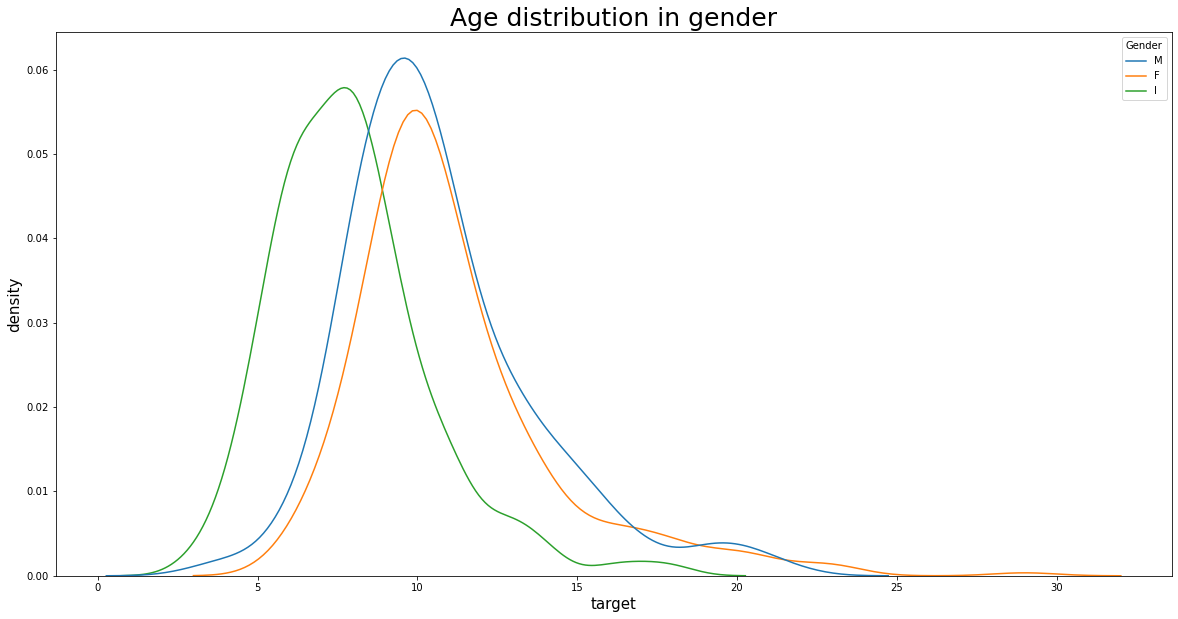

In [15]:
# 성별별 나이 분포
plt.rcParams['figure.figsize'] = [20,10]
sns.kdeplot('Target', hue = 'Gender', data = train_df)
plt.title('Age distribution in gender', fontsize = 25)
plt.xlabel('target', fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.show()
plt.close()

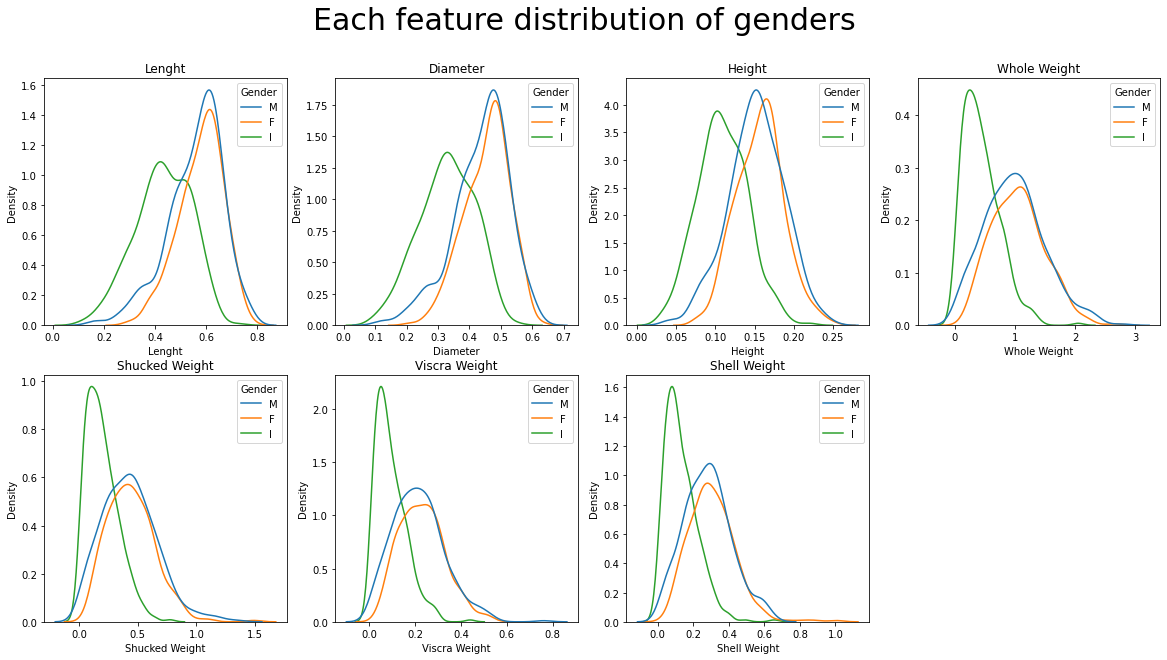

In [16]:
# 성별별 feature 값들의 분포
plt.figure(figsize=(20,10))
plt.suptitle("Each feature distribution of genders", fontsize=30)

for i in range(len(numeric_feature)):
    plt.subplot(2,4,i+1)
    plt.title(numeric_feature[i])
    sns.kdeplot(x = train_df[numeric_feature[i]], hue = 'Gender', data = train_df)
plt.show()
plt.close()

**I는 이상치가 아님을 확인**
* 만약 성별 알 수 없어 이상치 I로 설정한 경우 M, F과 비슷한 나이별 피쳐의 분포 양상을 보일 것임
* 하지만 그렇지 않고 I 혼자 특이한 분포 양상을 보임
* I는 중성이거나 같이 건강하지 못한 부류로 간주할 수 있음 
* 결론은 I는 이상치가 아님


# 기말 범위

# 데이터 전처리

In [47]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

test_df = pd.read_csv('./test2.csv')
train_df = pd.read_csv('./train2.csv')
train_df.head()

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [48]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1 
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)
    return dataframe

In [49]:
train_le = make_label_map(train_df[['Gender']])
test_le = make_label_map(test_df[['Gender']])
gender_df = label_encoder(train_df[['Gender']], train_le)
gender_df = label_encoder(train_df[['Gender']], test_le)
train_df['Gender'] = gender_df[['Gender']]
test_df['Gender'] = gender_df[['Gender']]


{'Gender': {'unknown': 0, 'M': 1, 'F': 2, 'I': 3}}
{'Gender': {'unknown': 0, 'F': 1, 'M': 2, 'I': 3}}


In [60]:
train_x = train_df.drop(['Unnamed: 0','id', 'Target'], axis=1)
test_x = test_df.drop(['Unnamed: 0','id', 'Target'], axis=1)
test_y = test_df.drop(['Unnamed: 0','id', 'Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight','Lenght',
                      'Gender'], axis=1)
test_y

,Target
0,9
1,19
2,11
3,6
4,10
...,...
121,11
122,9
123,11
124,7


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(RandomForestRegressor(random_state=32))
models.append(LinearRegression())
models.append(GradientBoostingRegressor(learning_rate=0.06, criterion='mae', random_state=32))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_x, train_y)

In [52]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(test_x)
    else:
        prediction += model.predict(test_x)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

1.4731734236204022

In [64]:
import joblib
# model save
joblib.dump(models,'./2019076021_김선우3.model')

['./2019076021_김선우3.model']